<a href="https://colab.research.google.com/github/ReubenOJacob/Tachycardia-Monitoring-System/blob/main/K_Means_Paper_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline








In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Medical Data.csv to Medical Data (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Medical Data.csv']))
print (df)

      Temp  HR
0     96.3  70
1     96.7  71
2     96.9  74
3     97.0  80
4     97.1  73
..     ...  ..
696  101.2  87
697  100.3  73
698  101.3  70
699   97.3  71
700  102.7  91

[701 rows x 2 columns]


In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','HR']])
    sse.append(km.inertia_)

    

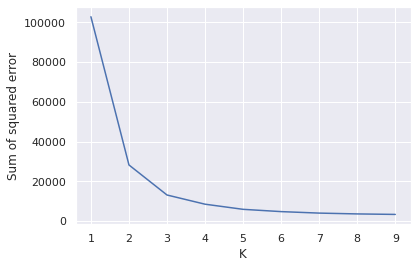

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Text(0, 0.5, 'HR')

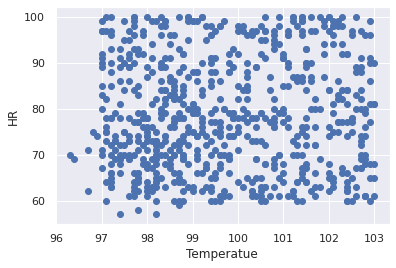

In [ ]:
plt.scatter(df.Temp,df.HR)
plt.xlabel('Temperatue')
plt.ylabel('HR')

By eye, it is relatively easy to pick out the four clusters.
The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Temp','HR']])
y_predicted 

array([0, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 3, 2, 0, 0, 3, 3, 0,
       2, 2, 2, 3, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 3, 2, 2, 3, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 3,
       3, 1, 0, 2, 2, 1, 0, 3, 0, 3, 2, 1, 1, 1, 2, 1, 2, 0, 3, 2, 1, 2,
       0, 1, 2, 3, 1, 1, 3, 0, 3, 0, 3, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 2,
       3, 1, 0, 1, 0, 2, 2, 0, 3, 3, 2, 3, 2, 0, 2, 0, 3, 1, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 3, 2, 2, 0, 2, 0, 3, 1, 1,
       1, 3, 3, 1, 1, 2, 0, 2, 0, 3, 3, 2, 2, 3, 0, 3, 1, 1, 3, 2, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 3, 3, 3, 2, 1, 2,
       2, 0, 1, 2, 0, 2, 1, 3, 1, 2, 2, 0, 0, 0, 2, 3, 1, 0, 0, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 3, 1, 1, 0, 1, 1, 3, 0, 1,

In [ ]:
df['cluster']=y_predicted
print(df)


      Temp  HR  cluster
0     96.3  70        0
1     96.7  71        2
2     96.9  74        2
3     97.0  80        2
4     97.1  73        2
..     ...  ..      ...
696  101.2  87        3
697  100.3  73        2
698  101.3  70        0
699   97.3  71        2
700  102.7  91        3

[701 rows x 3 columns]


In [ ]:
km.cluster_centers_

array([[99.75022831, 65.10958904],
       [99.93703704, 96.74074074],
       [99.53679245, 76.04245283],
       [99.73703704, 86.62222222]])

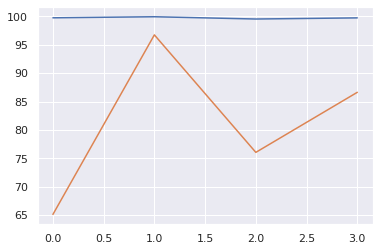

In [ ]:
plt.plot(km.cluster_centers_)

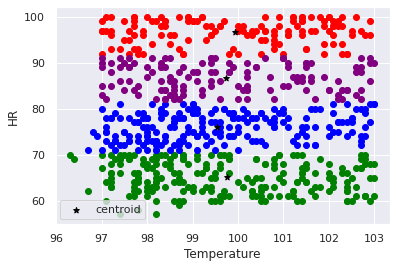

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Temp,df1['HR'],color='green')
plt.scatter(df2.Temp,df2['HR'],color='red')
plt.scatter(df3.Temp,df3['HR'],color='blue')
plt.scatter(df4.Temp,df4['HR'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Temperature')
plt.ylabel('HR')
plt.legend()


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['HR']])
df['HR'] = scaler.transform(df[['HR']])

scaler.fit(df[['Temp']])
df['Temp'] = scaler.transform(df[['Temp']])


In [ ]:
print(df)


         Temp        HR  cluster
0    0.000000  0.302326        0
1    0.059701  0.325581        2
2    0.089552  0.395349        2
3    0.104478  0.534884        2
4    0.119403  0.372093        2
..        ...       ...      ...
696  0.731343  0.697674        3
697  0.597015  0.372093        2
698  0.746269  0.302326        0
699  0.149254  0.325581        2
700  0.955224  0.790698        3

[701 rows x 3 columns]


Text(0, 0.5, 'HR')

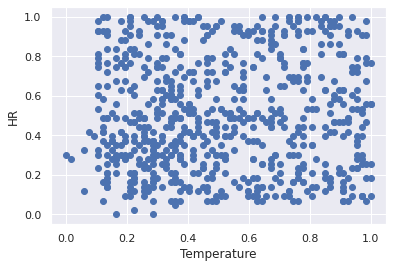

In [ ]:
plt.scatter(df.Temp,df['HR']) 
plt.xlabel('Temperature')
plt.ylabel('HR')

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Temp','HR']])
y_predicted 

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 2,
       0, 2, 3, 1, 1, 2, 1, 0, 3, 2, 3, 2, 0, 0, 1, 2, 1, 3, 2, 1, 2, 0,
       3, 2, 1, 0, 2, 0, 2, 3, 0, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 0, 1, 1,
       0, 2, 3, 0, 3, 3, 3, 3, 2, 2, 1, 0, 3, 3, 3, 1, 0, 2, 3, 0, 1, 1,
       3, 3, 1, 1, 1, 2, 2, 0, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 3, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 3,
       3, 1, 3, 1, 0, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 2, 2, 2, 3, 0, 1,
       3, 1, 0, 3, 3, 3, 2, 2, 2, 3, 1, 1, 3, 1, 1, 0, 2, 1, 1, 0, 1, 1,
       3, 3, 0, 3, 3, 3, 2, 0, 2, 1, 2, 0, 0, 3, 0,

In [ ]:
df['cluster']=y_predicted
print(df) 

         Temp        HR  cluster
0    0.000000  0.302326        1
1    0.059701  0.325581        1
2    0.089552  0.395349        1
3    0.104478  0.534884        1
4    0.119403  0.372093        1
..        ...       ...      ...
696  0.731343  0.697674        0
697  0.597015  0.372093        3
698  0.746269  0.302326        3
699  0.149254  0.325581        1
700  0.955224  0.790698        0

[701 rows x 3 columns]


In [ ]:
km.cluster_centers_

array([[0.77894618, 0.81042988],
       [0.31744004, 0.31788978],
       [0.31142943, 0.78476666],
       [0.77868327, 0.29048366]])

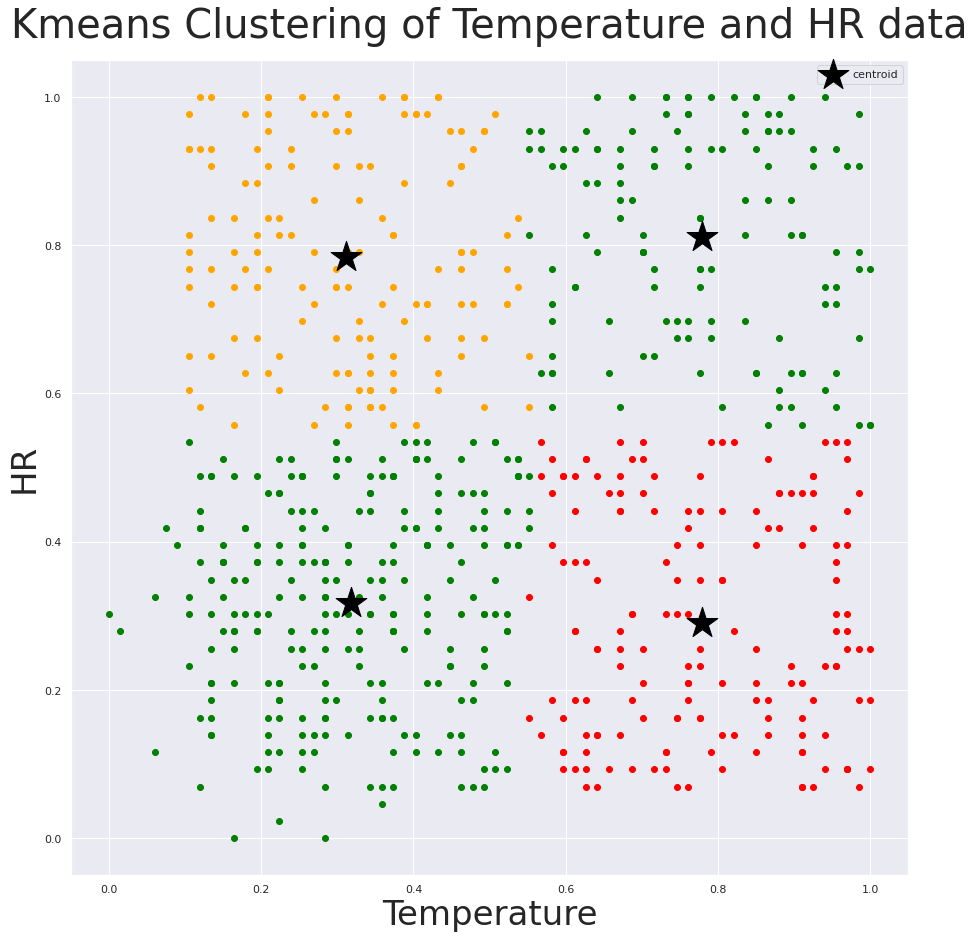

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.figure(figsize=(15,15))
plt.scatter(df1.Temp,df1['HR'],color='green')
plt.scatter(df2.Temp,df2['HR'],color='green')
plt.scatter(df3.Temp,df3['HR'],color='orange')
plt.scatter(df4.Temp,df4['HR'],color='red')


plt.title("Kmeans Clustering of Temperature and HR data", fontsize=40, y=1.02)
plt.xlabel("Temperature", fontsize=34)
plt.ylabel("HR", fontsize=34)
plt.xlabel('Temperature')
plt.ylabel('HR')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=1050)




plt.legend() 